<a href="https://colab.research.google.com/github/Kenrich005/FMCG_StockPricePrediction/blob/main/FMCG_SharePricePrediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Kenrich005/FMCG_StockPricePrediction/main/FMCG_20companies.csv')
df.head()

,Quarters,Company,Oil Price,Total Income From Operations,Return on Equity Ratio,Price-Equity Ratio,Gross Margin,Profit Margin,EPS,EV/Net Operating Revenue,Change in Inventory,CPI,Closing Stock Price
0,Mar '20,Procter and Gamble,2392.98,656.05,20.21,146.39,0.64,0.14,28.07,52.15,-16.18,148.6,4109.05
1,Dec '19,Procter and Gamble,4509.77,859.27,26.47,103.92,0.65,0.16,41.88,39.81,21.20,150.4,4352.30
2,Sep '19,Procter and Gamble,4282.87,852.14,26.25,111.13,0.59,0.16,42.16,40.15,-8.62,145.8,4685.15
3,Jun '19,Procter and Gamble,4149.67,637.29,19.63,219.22,0.55,0.10,18.73,53.68,-25.40,142.9,4106.05
4,Mar '19,Procter and Gamble,4432.04,699.34,21.54,132.34,0.61,0.13,27.76,45.39,25.80,140.4,3673.65


In [ ]:
df.shape

(480, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Quarters                      480 non-null    object 
 1   Company                       480 non-null    object 
 2   Oil Price                     480 non-null    float64
 3   Total Income From Operations  480 non-null    float64
 4   Return on Equity Ratio        480 non-null    float64
 5   Price-Equity Ratio            480 non-null    float64
 6   Gross Margin                  480 non-null    float64
 7   Profit Margin                 480 non-null    float64
 8   EPS                           480 non-null    float64
 9   EV/Net Operating Revenue      480 non-null    float64
 10  Change in Inventory           480 non-null    float64
 11  CPI                           480 non-null    float64
 12  Closing Stock Price           480 non-null    float64
dtypes: fl

## Creating y-variable

In [ ]:
df['Next Quarter StockPrice'] = df.groupby('Company')['Closing Stock Price'].shift(1)
df['Quarterly Return %'] = (df['Next Quarter StockPrice']/df['Closing Stock Price'])-1
df['3% Return'] = np.where(df['Quarterly Return %']>=0.03,1,0)
df.head()

,Quarters,Company,Oil Price,Total Income From Operations,Return on Equity Ratio,Price-Equity Ratio,Gross Margin,Profit Margin,EPS,EV/Net Operating Revenue,Change in Inventory,CPI,Closing Stock Price,Next Quarter StockPrice,Quarterly Return %,3% Return
0,Mar '20,Procter and Gamble,2392.98,656.05,20.21,146.39,0.64,0.14,28.07,52.15,-16.18,148.6,4109.05,NaN,NaN,0
1,Dec '19,Procter and Gamble,4509.77,859.27,26.47,103.92,0.65,0.16,41.88,39.81,21.20,150.4,4352.30,4109.05,-0.055890,0
2,Sep '19,Procter and Gamble,4282.87,852.14,26.25,111.13,0.59,0.16,42.16,40.15,-8.62,145.8,4685.15,4352.30,-0.071044,0
3,Jun '19,Procter and Gamble,4149.67,637.29,19.63,219.22,0.55,0.10,18.73,53.68,-25.40,142.9,4106.05,4685.15,0.141036,1
4,Mar '19,Procter and Gamble,4432.04,699.34,21.54,132.34,0.61,0.13,27.76,45.39,25.80,140.4,3673.65,4106.05,0.117703,1


In [ ]:
df['3% Return'].value_counts()

0    249
1    231
Name: 3% Return, dtype: int64

## Train Test Split

In [ ]:
df_test = df[df["Quarters"].isin(["Mar '20","Dec '19","Sep '19","Jun '19"])]
df_train = df[~df['Quarters'].isin(df_test['Quarters'])]

df_train.shape, df_test.shape

((400, 16), (80, 16))

In [ ]:
y_train = df_train['3% Return']
X_train = df_train.drop(['Quarterly Return %','Next Quarter StockPrice','3% Return'],axis=1)
y_test = df_test['3% Return']
X_test = df_test.drop(['Quarterly Return %','Next Quarter StockPrice','3% Return'],axis=1)

X_train.shape, y_train.shape

((400, 13), (400,))

## Preprocessing Function

In [ ]:
def data_preprocessor(df):
  df['Month'],df['Year'] = df['Quarters'].str.split().str
  df['Year'] = df['Year'].str.replace("'","").astype(int)
  print("Quarter column split in Month and Year")
  df.drop("Quarters",axis=1,inplace=True)
  print("Quarter column dropped from dataframe")

In [ ]:
data_preprocessor(X_train)
data_preprocessor(X_test)
X_train.head(2)

Quarter column split in Month and Year
Quarter column dropped from dataframe
Quarter column split in Month and Year
Quarter column dropped from dataframe


,Company,Oil Price,Total Income From Operations,Return on Equity Ratio,Price-Equity Ratio,Gross Margin,Profit Margin,EPS,EV/Net Operating Revenue,Change in Inventory,CPI,Closing Stock Price,Month,Year
4,Procter and Gamble,4432.04,699.34,21.54,132.34,0.61,0.13,27.76,45.39,25.80,140.4,3673.65,Mar,19
5,Procter and Gamble,3822.07,818.07,25.20,80.65,0.57,0.15,38.24,38.80,11.46,140.1,3084.20,Dec,18


## Split Categorical and Numerical variables

In [ ]:
all_cols = list(X_train.columns)
cat_cols = list(X_train.select_dtypes("object").columns)
num_cols = list(set(all_cols)- set(cat_cols))
num_cols

['Oil Price',
 'Profit Margin',
 'Change in Inventory',
 'Closing Stock Price',
 'Price-Equity Ratio',
 'EPS',
 'CPI',
 'Year',
 'Gross Margin',
 'EV/Net Operating Revenue',
 'Return on Equity Ratio',
 'Total Income From Operations']

## One Hot Encoding for Categorical Variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore')
ohe_encoder.fit(X_train[cat_cols])
ohe_encoder.categories_

[array(['Britannia', 'CCL Products India Ltd.', 'Colgate Palmolive',
        'Dabur India', 'Emami', 'Gillette India', 'Globus Spirits Ltd.',
        'Godrej Consumer', 'HU', 'Hatsun Agro', 'Heritage Foods', 'ITC',
        'Jubiliant Foodworks', 'Marico', 'Nestle', 'Procter and Gamble',
        'Tasty Bite Eatables', 'Tata Consumer Products',
        'United Breweries Ltd.', 'United Spirits Ltd'], dtype=object),
 array(['Dec', 'Jun', 'Mar', 'Sep'], dtype=object)]

In [ ]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_cols))
encoded_cat_names

['Company_Britannia',
 'Company_CCL Products India Ltd.',
 'Company_Colgate Palmolive',
 'Company_Dabur India',
 'Company_Emami',
 'Company_Gillette India',
 'Company_Globus Spirits Ltd.',
 'Company_Godrej Consumer',
 'Company_HU',
 'Company_Hatsun Agro',
 'Company_Heritage Foods',
 'Company_ITC',
 'Company_Jubiliant Foodworks',
 'Company_Marico',
 'Company_Nestle',
 'Company_Procter and Gamble',
 'Company_Tasty Bite Eatables',
 'Company_Tata Consumer Products',
 'Company_United Breweries Ltd.',
 'Company_United Spirits Ltd',
 'Month_Dec',
 'Month_Jun',
 'Month_Mar',
 'Month_Sep']

## Standard Scaling for Numerical Variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train[num_cols])

StandardScaler()

In [ ]:
scaled_num_names = list(sc.feature_names_in_)
scaled_num_names

['Oil Price',
 'Profit Margin',
 'Change in Inventory',
 'Closing Stock Price',
 'Price-Equity Ratio',
 'EPS',
 'CPI',
 'Year',
 'Gross Margin',
 'EV/Net Operating Revenue',
 'Return on Equity Ratio',
 'Total Income From Operations']

In [ ]:
all_feature_names = encoded_cat_names + scaled_num_names
all_feature_names

['Company_Britannia',
 'Company_CCL Products India Ltd.',
 'Company_Colgate Palmolive',
 'Company_Dabur India',
 'Company_Emami',
 'Company_Gillette India',
 'Company_Globus Spirits Ltd.',
 'Company_Godrej Consumer',
 'Company_HU',
 'Company_Hatsun Agro',
 'Company_Heritage Foods',
 'Company_ITC',
 'Company_Jubiliant Foodworks',
 'Company_Marico',
 'Company_Nestle',
 'Company_Procter and Gamble',
 'Company_Tasty Bite Eatables',
 'Company_Tata Consumer Products',
 'Company_United Breweries Ltd.',
 'Company_United Spirits Ltd',
 'Month_Dec',
 'Month_Jun',
 'Month_Mar',
 'Month_Sep',
 'Oil Price',
 'Profit Margin',
 'Change in Inventory',
 'Closing Stock Price',
 'Price-Equity Ratio',
 'EPS',
 'CPI',
 'Year',
 'Gross Margin',
 'EV/Net Operating Revenue',
 'Return on Equity Ratio',
 'Total Income From Operations']

## Creating Column Transformer

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('cat', ohe_encoder, cat_cols),
                                               ('sc', sc, num_cols)],
                                 remainder='passthrough')

## Linear Models

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 100, max_iter = 1000)

## Creating Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
logreg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', logreg)],
                   verbose=True)

In [ ]:
logreg_v1.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'Month']),
                                                 ('sc', StandardScaler(),
                                                  ['Oil Price', 'Profit Margin',
                                                   'Change in Inventory',
                                                   'Closing Stock Price',
                                                   'Price-Equity Ratio', 'EPS',
                                                   'CPI', 'Year',
                                                   'Gross Margin',
                                                   'EV/Net Operating Revenue',
                                                   'Return on Equity Ratio',
               

In [ ]:
dict( zip( all_feature_names, np.round(logreg.coef_[0], 5) ) )

{'Company_Britannia': -0.07985,
 'Company_CCL Products India Ltd.': 0.10407,
 'Company_Colgate Palmolive': -0.20719,
 'Company_Dabur India': 0.30406,
 'Company_Emami': -0.13635,
 'Company_Gillette India': 0.4743,
 'Company_Globus Spirits Ltd.': -0.27773,
 'Company_Godrej Consumer': 0.36415,
 'Company_HU': 0.23918,
 'Company_Hatsun Agro': 0.42938,
 'Company_Heritage Foods': 0.16089,
 'Company_ITC': -0.30088,
 'Company_Jubiliant Foodworks': -0.52142,
 'Company_Marico': 0.68372,
 'Company_Nestle': 0.17691,
 'Company_Procter and Gamble': -1.08741,
 'Company_Tasty Bite Eatables': 0.28768,
 'Company_Tata Consumer Products': -0.21337,
 'Company_United Breweries Ltd.': -0.04019,
 'Company_United Spirits Ltd': -0.36033,
 'Month_Dec': -0.03032,
 'Month_Jun': -0.06993,
 'Month_Mar': -0.08247,
 'Month_Sep': 0.18232,
 'Oil Price': 0.11254,
 'Profit Margin': -0.32881,
 'Change in Inventory': -0.06852,
 'Closing Stock Price': -0.51435,
 'Price-Equity Ratio': -1.16407,
 'EPS': 0.83894,
 'CPI': -1.042,

## Predict on Test Set

In [ ]:
y_pred = logreg_v1.predict(X_test)

In [ ]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred})
y_df.head(10)

,actual,predicted
0,0,0
1,0,0
2,0,1
3,1,0
24,0,0
25,1,0
26,1,0
27,0,0
48,0,0
49,0,0


### Measuring Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_df.actual, y_df.predicted)

0.625

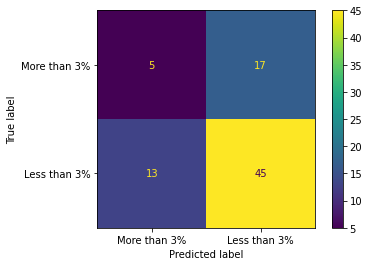

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_df.actual, y_df.predicted, labels = [1,0])
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['More than 3%', 'Less than 3%'])
cm_plot.plot();

## K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier( n_neighbors = 10 )

In [ ]:
from sklearn.pipeline import Pipeline
knnclf_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', knn_clf)],
                   verbose=True)
knnclf_v1.fit(X_train, y_train)
y_knn_pred = knnclf_v1.predict(X_test)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.6375

In [ ]:
knn_test_pred = pd.DataFrame( { 'actual':  y_test,
                                'predicted': y_knn_pred } )
knn_test_pred.head()



,actual,predicted
0,0,1
1,0,1
2,0,1
3,1,1
24,0,0


In [ ]:
knn_test_pred.shape

(80, 2)

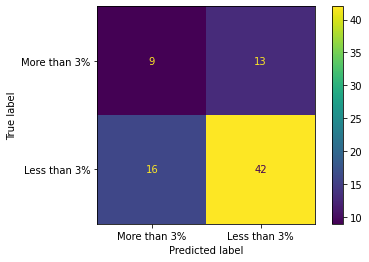

In [ ]:
cm_knn = confusion_matrix(knn_test_pred.actual, knn_test_pred.predicted, labels = [1,0])

knn_cm_plot = ConfusionMatrixDisplay(cm_knn, 
                                     display_labels=['More than 3%', 'Less than 3%'])
knn_cm_plot.plot();